Before we make any prediction using our super models and all it is important to understand on what we are actually trying to solve:


    Did you know ?

    According to WHO about 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.5 million 
    deaths are directly attributed to diabetes each year.And diabetes is increasing steadily as years are coming.

I am sure many of the people we know suffer from diabetes but what is this diabetes and why does it occur?

    Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to 
    serious damage to the heart, blood vessels, eyes, kidneys and nerves.There are 2 types of diabetes:
    - Type 1 : usually found in adults,occurs via food intake
    - Type 2 : commonly occurs through genetics

Let us not go indepth about the disease as it may take forever,let us start our analysis.

### Importing necessary libraries and the dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [38]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/diabetes prediction/diabetes.csv"
data = pd.read_csv(file)
pd.options.display.float_format = '{:.2f}'.format

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [40]:
data.shape

(768, 9)

#### Let us see what our features mean and represent:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose  tolerance test
- blood pressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function(likelihood of diabetes from family history)
- Age: Age (years)

- outcome: our dependent variable

In [41]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


observations:
- only Glucose and Bmi seems to have less variations
- Insulin has a very high variations
- every other features also seems to have a high variation

In [42]:
df = data.copy()

In [43]:
df['age_bins'] = pd.cut(x = df['Age'],bins=[20,41,61,82],labels = ['age(21-41)','age(41-61)','age(61-81)'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148,72,35,0,33.60,0.63,50,1,age(41-61)
1,1,85,66,29,0,26.60,0.35,31,0,age(21-41)
2,8,183,64,0,0,23.30,0.67,32,1,age(21-41)
3,1,89,66,23,94,28.10,0.17,21,0,age(21-41)
4,0,137,40,35,168,43.10,2.29,33,1,age(21-41)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   age_bins                  768 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 55.0 KB


### missing values

In [45]:
missing = [feature for feature in df.columns if df[feature].isnull().sum()>0]
missing

[]

#### checking for the missing values pandas cannot detect

In [46]:
na = ['na','n/a','-',' ',"--"]
miss = pd.read_csv(file,na_values=na)
miss.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking for any duplicate columns:
- just by looking at the features we know that there are no duplicates present but nontheless let us check it

In [47]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False])

let us convert all columns into lower case for easier working with data

In [48]:
df.columns = df.columns.str.lower()
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'age_bins'],
      dtype='object')

### Numerical Variables

#### Discrete variables

In [49]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique())<25]
discrete_features

['pregnancies', 'outcome', 'age_bins']

#### Univariate analysis of discrete variables

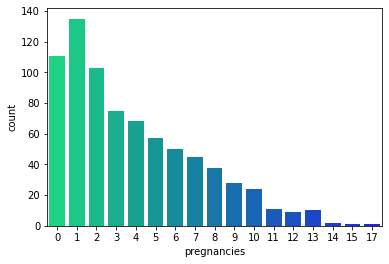

In [50]:
sns.countplot('pregnancies',data=df,palette = 'winter_r');

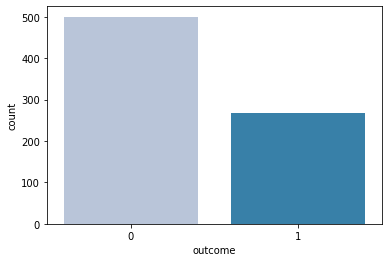

In [51]:
sns.countplot('outcome',data=df,palette ='PuBu')

observations:
- most of the woman had around 0-2 pregnancies
- as the number of pregnancies increases so does the count
- the count of people not having diabetes is higher than people having diabetes

#### Relation between the pregnancies and the output

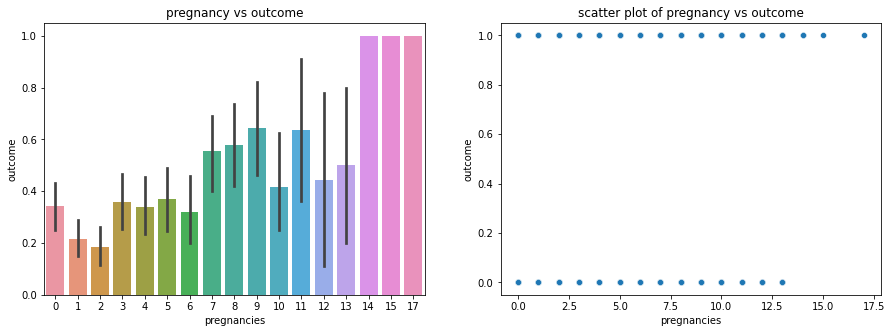

In [52]:
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
sns.barplot(x='pregnancies',y='outcome',data=df)
plt.title('pregnancy vs outcome')

plt.subplot(1,2,2)
sns.scatterplot(x='pregnancies',y='outcome',data=df)
plt.title('scatter plot of pregnancy vs outcome')
plt.show()

observations:
- If a woman have more than 14 pregnancies she is sure to have Diabetes,becuase as the number of pregnancy increases so does the probability of diabetes
- as for woman with lower number of pregnancies they are not highly prone to sugar
- however we cannot be a 100% sure because the error bar shows that the data collected overlaps one another

### Continuos variables

In [53]:
continuos_features = [feature for feature in df.columns if feature not in discrete_features]
print(continuos_features)

['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']


#### Univariate analysis of continuos features

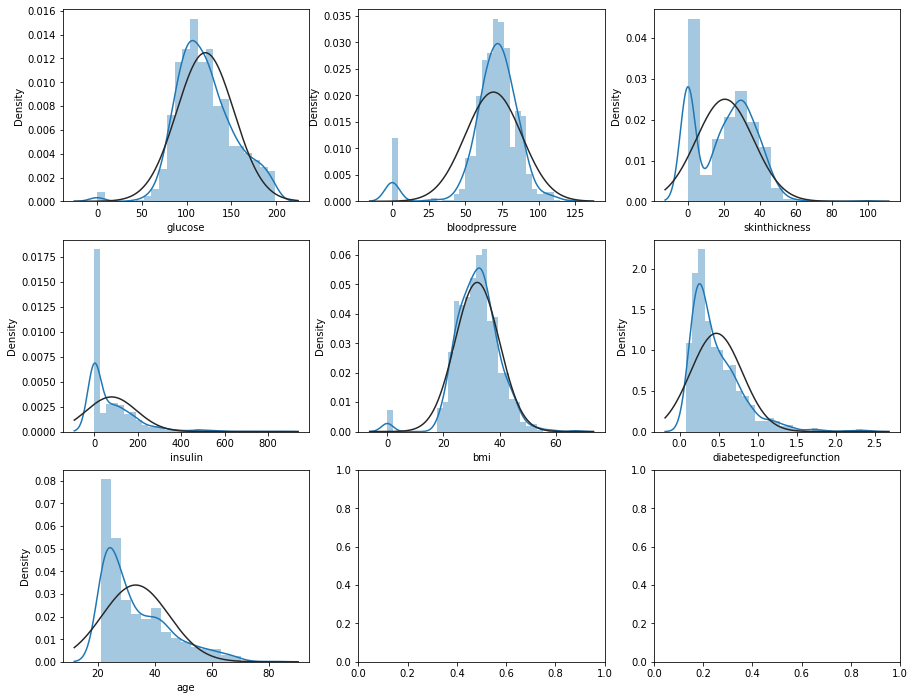

In [54]:
from scipy import stats
from scipy.stats import norm

fig,ax = plt.subplots(3,3,figsize=(15,12))
for variable, subplot in zip(continuos_features,ax.flatten()):
  sns.distplot(df[variable],ax=subplot,fit=norm)

In [55]:
for features in continuos_features:
  print("skew of",features,":%f" % df[features].skew())

skew of glucose :0.173754
skew of bloodpressure :-1.843608
skew of skinthickness :0.109372
skew of insulin :2.272251
skew of bmi :-0.428982
skew of diabetespedigreefunction :1.919911
skew of age :1.129597


observations:
- age,diabetespedigreefunction and insulin are right skewed
- every other feature is more or less normally distributed
- a simple log transformation should suffice.

#### Relation between outcome and continuos features

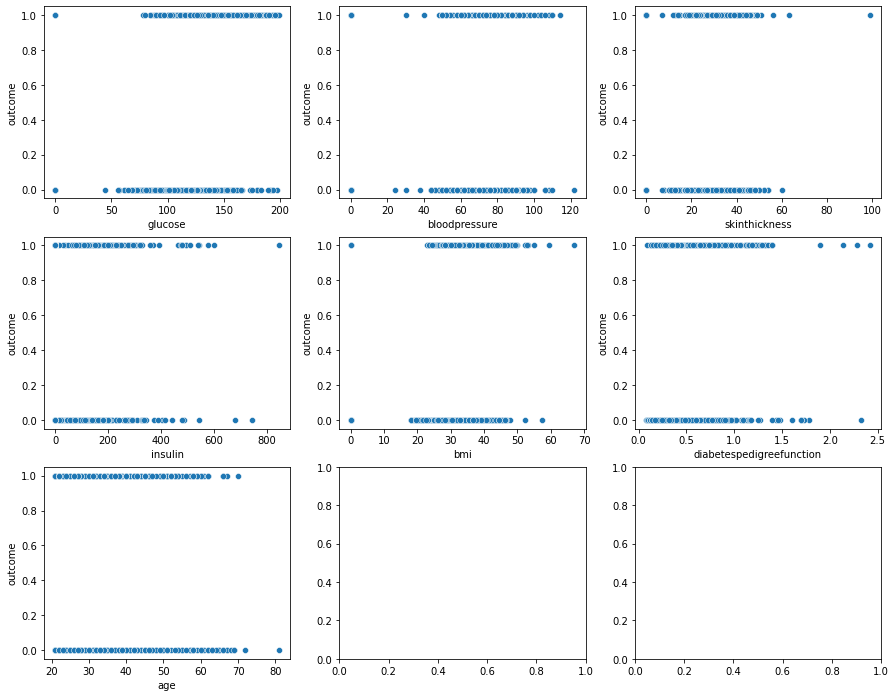

In [56]:
fig,ax = plt.subplots(3, 3, figsize=(15, 12))
for variable,subplot in zip(continuos_features,ax.flatten()):
  sns.scatterplot(x=variable,y='outcome',data=df,ax=subplot)

### Outliers

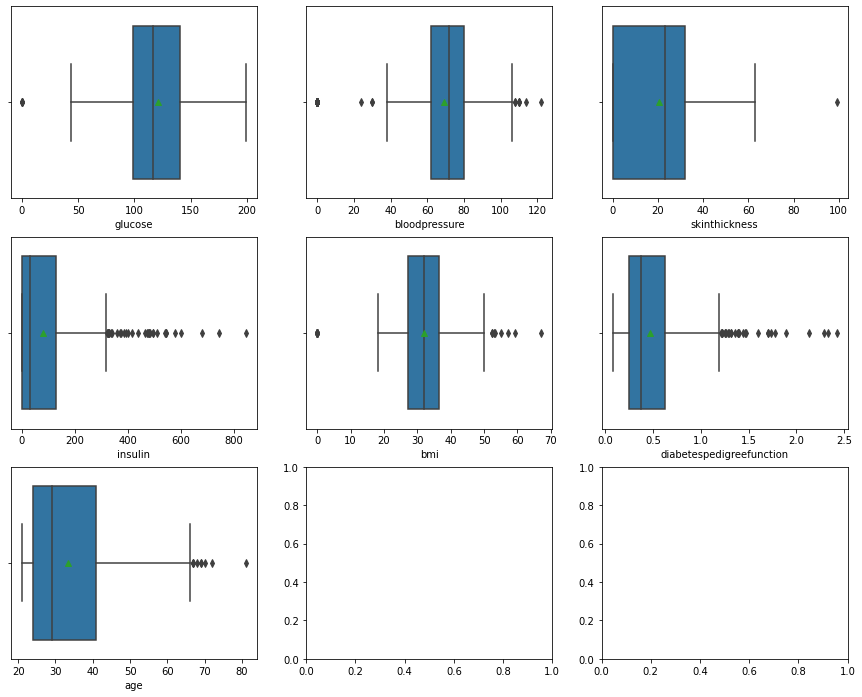

In [57]:
fig,ax = plt.subplots(3,3,figsize=(15,12))
for variable,subplot in zip(continuos_features,ax.flatten()):
  sns.boxplot(x=variable,data=df,ax=subplot,showmeans=True)

observations:
- There seems to be slight outliers present in all of our features.
- since we are dealing with health related set it is better  not to remove these outliers as it could be of significance.
- a simple log transformation should do the trick

    Let us see how our variables will be distributed after the log transformation even though most of our variables are normally distributed.
    since 0 is present let us use Square root transformation or box-cox

In [58]:
def log_continuos(feature):
  data = df.copy()
  plt.figure(figsize =(13,5))
  plt.subplot(1,2,1)
  sns.distplot(data[feature],fit=norm)
  plt.title("Before log transformation")

  plt.subplot(1,2,2)
  data[feature] = np.sqrt(data[feature])
  sns.distplot(data[feature],fit=norm)
  plt.title("After log transformation")
  plt.show()

In [59]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'age_bins'],
      dtype='object')

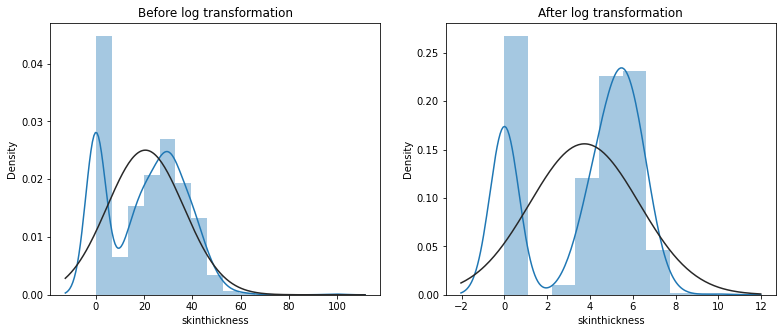

In [60]:
log_continuos('skinthickness')

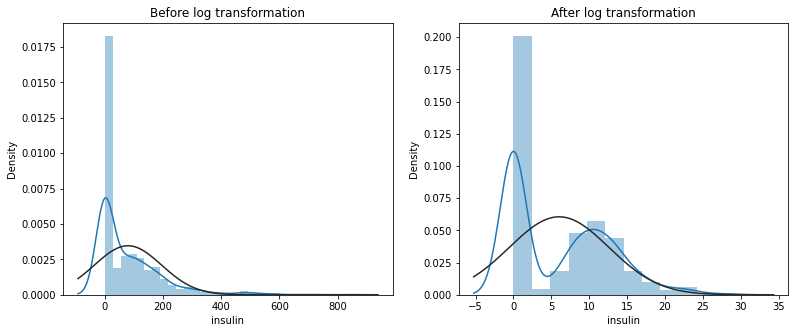

In [61]:
log_continuos('insulin')

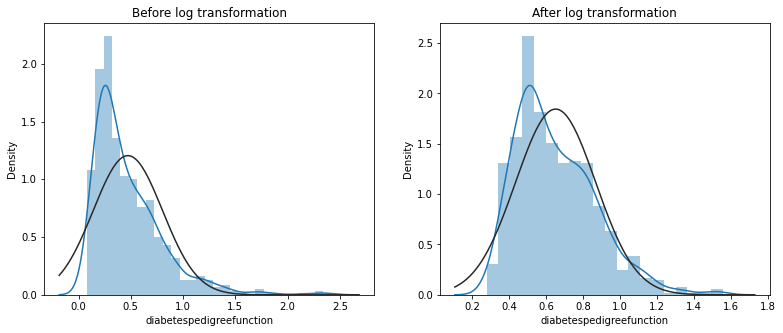

In [62]:
log_continuos('diabetespedigreefunction')

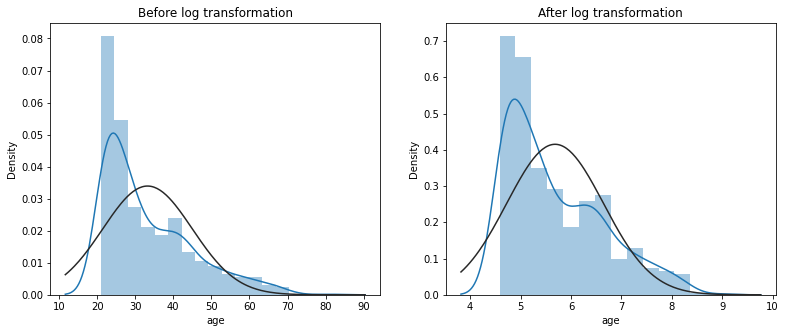

In [63]:
log_continuos('age')

That concludes the basic analysis of our dataset now let us see what other thing we can find about the dataset

#### Q1 : What was the distribution of age in our collected dataset?

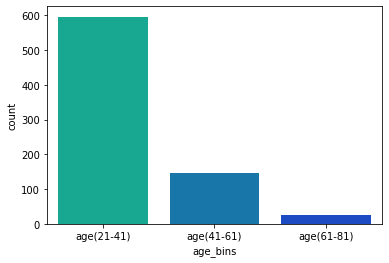

In [64]:
sns.countplot('age_bins',data=df,palette = 'winter_r')

- most data were of people aged between 21- 41
- followed by ages 41-61 and then 61-81

#### Q2: Is there any relation between the age of a person and glucose?

In [65]:
print(df.age.min())
print(df.age.max())

21
81


In [66]:
age_glucose = pd.DataFrame.pivot_table(df,index = ['age_bins'],aggfunc={'glucose':np.mean})
age_glucose

,glucose
age_bins,
age(21-41),117.89
age(41-61),130.49
age(61-81),136.16


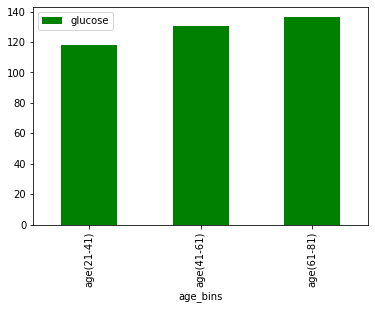

In [67]:
age_glucose.plot(kind='bar',color=['g'])

- average glucose is higher in the people aged (61-81),however one thing we have to check in here is that the average glucose level in the people ages (41-61) is close to that of the people aged(61-81)
- people aged 21-41 have a lower glucose which does not come as a surprise as age is one of the main factor for the increase in glucose

#### Q3 : Is there any relation between the age and pregnancy?

In [68]:
age_preg = pd.DataFrame.pivot_table(df,index =['age_bins'],aggfunc={'pregnancies':np.sum})
age_preg

,pregnancies
age_bins,
age(21-41),1808
age(41-61),1025
age(61-81),120


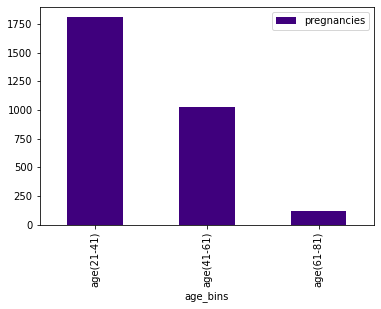

In [69]:
age_preg.plot(kind='bar',cmap='Purples_r')

- Most people marry between the age of 25-35 so most number of pregnancies are of people between that age

#### Q3: similar to the above one the relation of age with every other feature?

In [70]:
age_rel = pd.DataFrame.pivot_table(df,index =['age_bins'],values = ['bloodpressure', 'skinthickness', 'insulin','bmi', 'diabetespedigreefunction']
                                   ,aggfunc = np.mean)
age_rel

,bloodpressure,bmi,diabetespedigreefunction,insulin,skinthickness
age_bins,,,,,
age(21-41),66.71,31.88,0.47,80.63,21.30
age(41-61),77.82,33.08,0.49,88.39,18.89
age(61-81),74.96,28.28,0.43,9.60,11.92


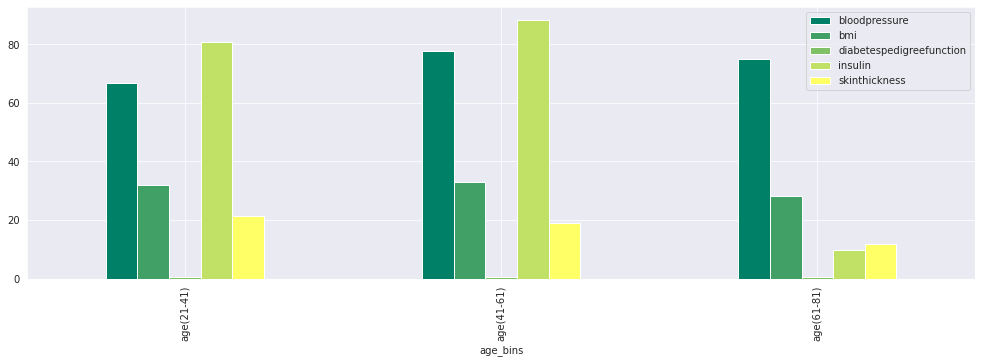

In [71]:
plt.rcParams["figure.figsize"] = (17,5)
sns.set_style('darkgrid')
age_rel.plot(kind='bar',cmap='summer')

observations:
- Bloodpressure:
    - people ages above 41 has a higher bloodpressure
- BMI:
    - bmi is same till the age 61 in our dataset but for people aged above 61 it decreses a bit
- diabetespedegreefunction:
    - the likelihood of genetic diabetes is less across all age groups in our dataset
- insulin:
    - people ages 41-61 has a higher insulin level followed by people age 21-41 and finally people aged 61-81
- skinthickness:
    - people aged 21-61 has a higher skinthickness compared to people aged 61-81 in our dataset

#### Q4 : Is there any features which are highly correlated with one another?

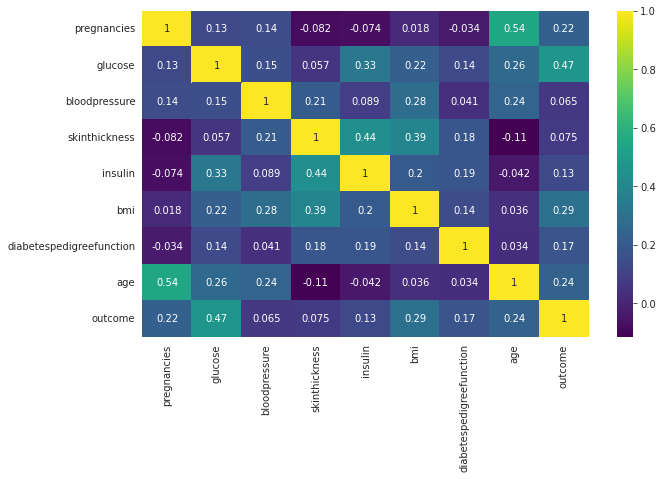

In [72]:
plt.rcParams["figure.figsize"] = (10,6)

corr = df.corr()
sns.heatmap(corr,annot=True,cmap='viridis')

observation:

    Positive correlation

- none of the features are heavily correlated with one another
- pregnancy is correlated to age.
- skinthickness and insulin are correlated with one another which is understandble because as insulin increases it affects the skin of a person.
- bmi and skinthickness are related as bmi increases the skinthikness increases a bit as well

      Negative correlation

- most of the features are negatively correlated with another
- pregnancy is negatively related to diabetespedegree function
- skinthickness is related to pregnancy
- insulin is related to age

#### Q5: For each increase in pregnancy what is the increase in all of the features?

In [85]:
stages = pd.DataFrame.pivot_table(df,index=['pregnancies'],values = ['glucose','bloodpressure','skinthickness','insulin','bmi',
                                                                      'diabetespedigreefunction'],aggfunc=np.mean)
stages

,bloodpressure,bmi,diabetespedigreefunction,glucose,insulin,skinthickness
pregnancies,,,,,,
0,67.15,34.29,0.52,123.00,81.68,22.27
1,67.79,31.37,0.49,112.75,98.67,24.44
2,63.25,30.58,0.49,110.80,85.84,21.60
3,66.59,30.43,0.43,123.59,87.45,20.08
4,70.03,32.14,0.45,125.12,69.44,15.88
5,76.21,33.19,0.40,118.86,57.30,17.39
6,68.42,30.29,0.43,120.80,63.58,17.64
7,70.78,32.63,0.44,136.44,84.47,20.29
8,75.18,31.57,0.50,131.74,92.82,17.32


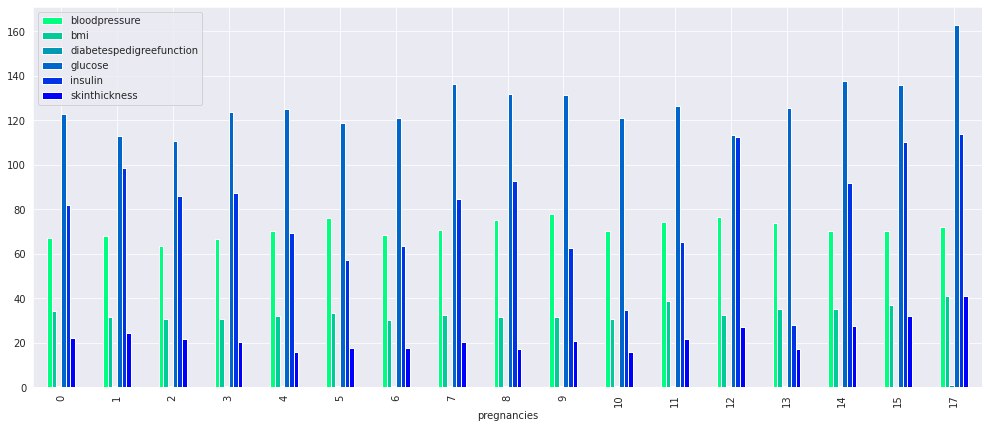

In [86]:
plt.rcParams["figure.figsize"] = (17,7)
sns.set_style('darkgrid')
stages.plot(kind='bar',cmap='winter_r')

observations:
- blood pressure almost remains the same
- bmi increase after 13 pregnancies
- there is no increase or decrease in dibetespedegreefunction
- there is a increase in glucose and insulin after 13 pregnancies
- there is not much increase or decrease in skithicknes

      This was the effect of all the features in various stages of pregnancy of our dataset

In [87]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'age_bins'],
      dtype='object')

**Thia concludes the analysis of diabetes dataset let us now proceed with the feature engineering and building the model**